# Libraries

In [1]:
import scipy.io as sio
import sys
sys.path.insert(0, "src")

from Type import Type
from helpers import *
from LDS import *
import pandas as pd
import numpy as np

from statsmodels

sys.path.insert(1, '../../Libraries')
import JacksonsTSPackage as jts

# Data

In [2]:
sst = sio.loadmat('data/sst.mat')
sst

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:14:49 2013',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[array([[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]])],
        [array([[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]])],
        [array([[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]])],
        ...,
        [array([[29.58, 29.12,

In [3]:
N = len(sst['X'])
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [4]:
tensor = sst['X']
T = Type('Diag', 'Diag', 'Diag')
I = sst['X'][0][0].shape
J = (2, 3)
M = len(I)
print(f"I: {I}")
print(f"J: {J}")
print(f"M: {M}")

I: (5, 6)
J: (2, 3)
M: 2


# LDS

### Unfolding the Tensor

In [5]:
X_vectorized = tensor_to_vector(tensor)
X_vectorized

array([[28.15, 28.43, 28.12, ..., 24.95, 25.71, 27.01],
       [28.16, 28.43, 28.11, ..., 25.07, 25.83, 27.01],
       [28.19, 28.44, 28.13, ..., 25.14, 25.98, 27.01],
       ...,
       [29.58, 29.33, 29.65, ..., 22.22, 23.81, 24.53],
       [29.61, 29.36, 29.78, ..., 22.16, 23.75, 24.5 ],
       [29.61, 29.45, 29.68, ..., 22.07, 23.7 , 24.48]])

In [6]:
sizes = np.zeros(prod(I))
for i in range(prod(I)):
    sizes[i] = num_params((prod(I),), (i + 1,), T)

J_lds = 0
curr_val = num_params(I, J, T)
for i in range(len(sizes)):
    if curr_val >= sizes[i]:
        J_lds = i
J_lds += 1
J_lds

1

### Extracting Training Data

In [7]:
train = extract_train(X_vectorized, N_train)
train

array([[28.15, 28.43, 28.12, ..., 24.95, 25.71, 27.01],
       [28.16, 28.43, 28.11, ..., 25.07, 25.83, 27.01],
       [28.19, 28.44, 28.13, ..., 25.14, 25.98, 27.01],
       ...,
       [29.21, 29.48, 29.04, ..., 22.35, 24.3 , 24.37],
       [29.2 , 29.47, 29.02, ..., 22.44, 24.31, 24.39],
       [29.25, 29.46, 29.01, ..., 22.58, 24.34, 24.43]])

In [8]:
train_df = pd.DataFrame(train)
train_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,28.15,28.43,28.12,28.56,29.29,28.27,28.81,27.69,28.36,29.73,...,28.67,27.12,25.84,27.30,27.63,29.26,26.99,24.95,25.71,27.01
1,28.16,28.43,28.11,28.56,29.31,28.27,28.81,27.70,28.34,29.76,...,28.68,27.19,26.02,27.41,27.63,29.44,27.12,25.07,25.83,27.01
2,28.19,28.44,28.13,28.57,29.34,28.30,28.81,27.74,28.33,29.83,...,28.68,27.42,26.17,27.55,27.63,29.66,27.33,25.14,25.98,27.01
3,28.28,28.48,28.18,28.66,29.39,28.34,28.81,27.83,28.32,29.92,...,28.74,27.59,26.23,27.62,27.63,29.86,27.48,25.24,26.08,27.01
4,28.39,28.54,28.26,28.82,29.43,28.39,28.81,28.01,28.42,30.05,...,28.77,27.81,26.26,27.64,27.63,29.92,27.66,25.22,26.12,27.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,29.26,29.50,29.08,29.49,29.89,29.08,28.75,28.49,29.15,29.48,...,27.61,25.98,23.53,25.68,26.24,27.98,25.75,22.27,24.30,24.37
1796,29.24,29.49,29.06,29.49,29.90,29.06,28.76,28.48,29.14,29.48,...,27.61,25.95,23.52,25.66,26.25,27.97,25.74,22.30,24.30,24.35
1797,29.21,29.48,29.04,29.49,29.89,29.03,28.78,28.46,29.14,29.48,...,27.62,25.95,23.52,25.64,26.25,27.97,25.73,22.35,24.30,24.37
1798,29.20,29.47,29.02,29.47,29.89,29.02,28.76,28.45,29.14,29.48,...,27.61,25.93,23.53,25.62,26.25,27.97,25.70,22.44,24.31,24.39


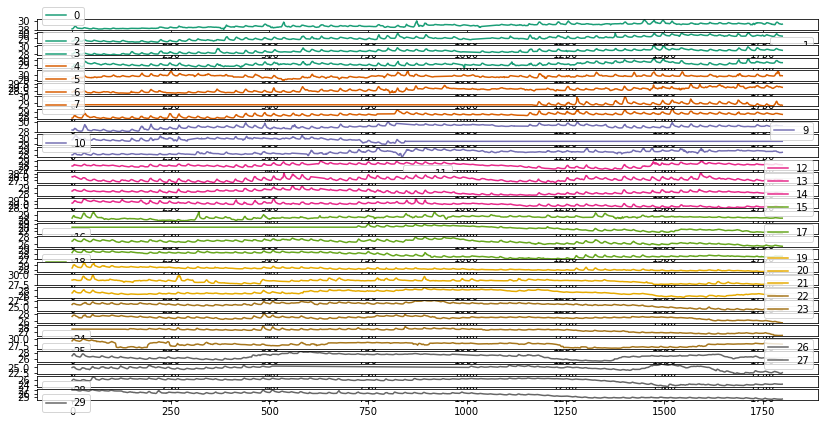

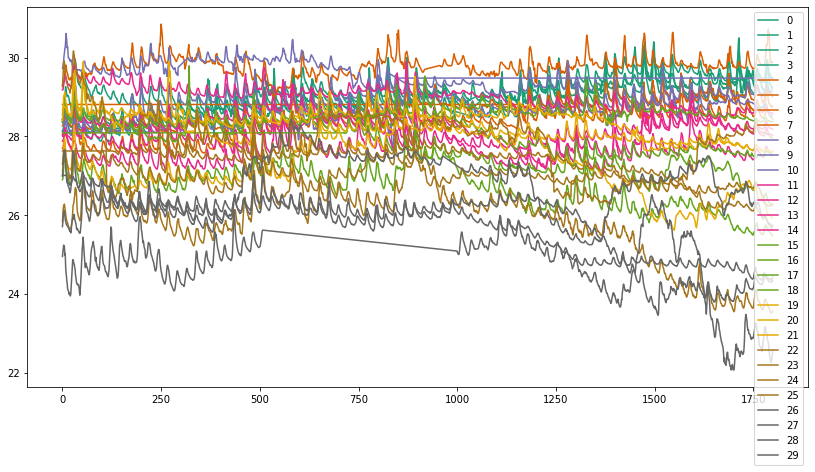

In [9]:
jts.plot_ts(train_df)

In [12]:
jts.var_order(train_df)

    Sequential Ratio Test 
 ---------------------------------------------------------------------------
p            AIC            BIC            HQIC            M          p-value
1        -203.643815    -200.803161    -202.595190     180455.860571 0.000000     
2        -212.158753    -206.566535    -210.094333     15579.036358  0.000000     
3        -212.268860    -203.922574    -209.187664     1002.203130   0.009669     
4        -212.257644    -201.154781    -208.158688     767.183120    0.999487     
5        -212.130661    -198.268709    -207.012961     548.479827    1.000000     
6        -211.813983    -195.190425    -205.676552     217.582763    1.000000     
7        -211.498379    -192.110696    -204.340230     199.499855    1.000000     
8        -211.160446    -189.006114    -202.980589     144.985256    1.000000     


    AIC  = 3
    BIC  = 2
    HQIC = 2


In [ ]:
model = VAR()